<a href="https://colab.research.google.com/github/Boris1001/model_deposit_forecasting/blob/main/forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Импортируем библиотеки
import pandas as pd #Пандас
import matplotlib.pyplot as plt #Отрисовка графиков
import numpy as np #Numpy

# Рисовать графики сразу же
%matplotlib inline

In [ ]:
# Подключаем Google drive для загрузки файлов
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Загружаем таблицу с данными
base_data = pd.read_excel('/content/drive/MyDrive/Тестовое/BST_DataSet.xlsx')

In [ ]:
# Проводим визуальный анализ
print(base_data.shape)   # Выводим размер таблицы
base_data.head()

(84, 12)


,Дата,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, млрд руб","М2, млрд руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб"
0,2011-01-01,-79049.0,5.244667,7.75,2.9,4.5,96.29,106.17151,5062.7,20011.9,30.08,20669
1,2011-02-01,180475.0,5.144211,8.00,3.1,4.4,103.96,106.99964,4830.7,19307.7,29.29,20680
2,2011-03-01,106845.0,5.021364,8.00,3.1,4.2,114.44,107.66304,4898.0,19536.7,28.43,22673
3,2011-04-01,224890.0,4.558571,8.00,2.6,4.1,123.15,108.12599,4918.2,19788.7,28.10,22519
4,2011-05-01,45856.0,4.795000,8.25,2.6,4.1,114.46,108.64500,5071.3,20020.8,27.87,22779


In [ ]:
# Делаем копию для работы с данными
data = base_data.copy()

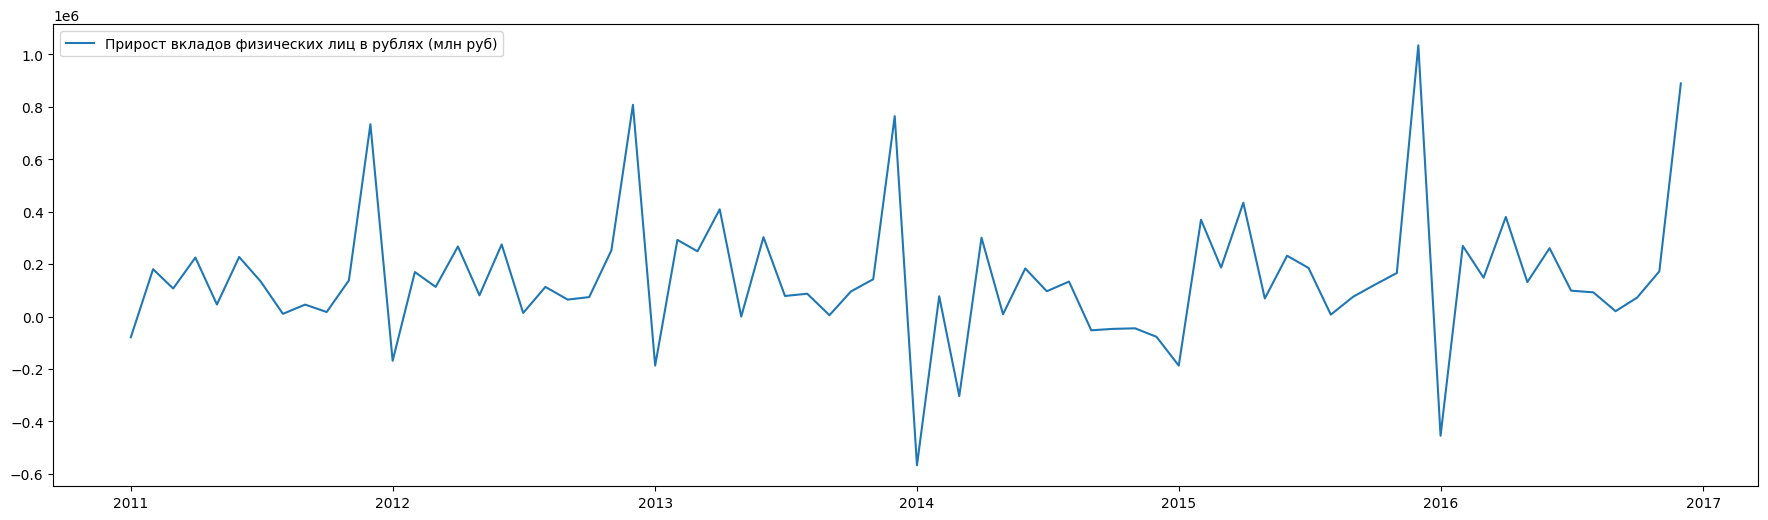

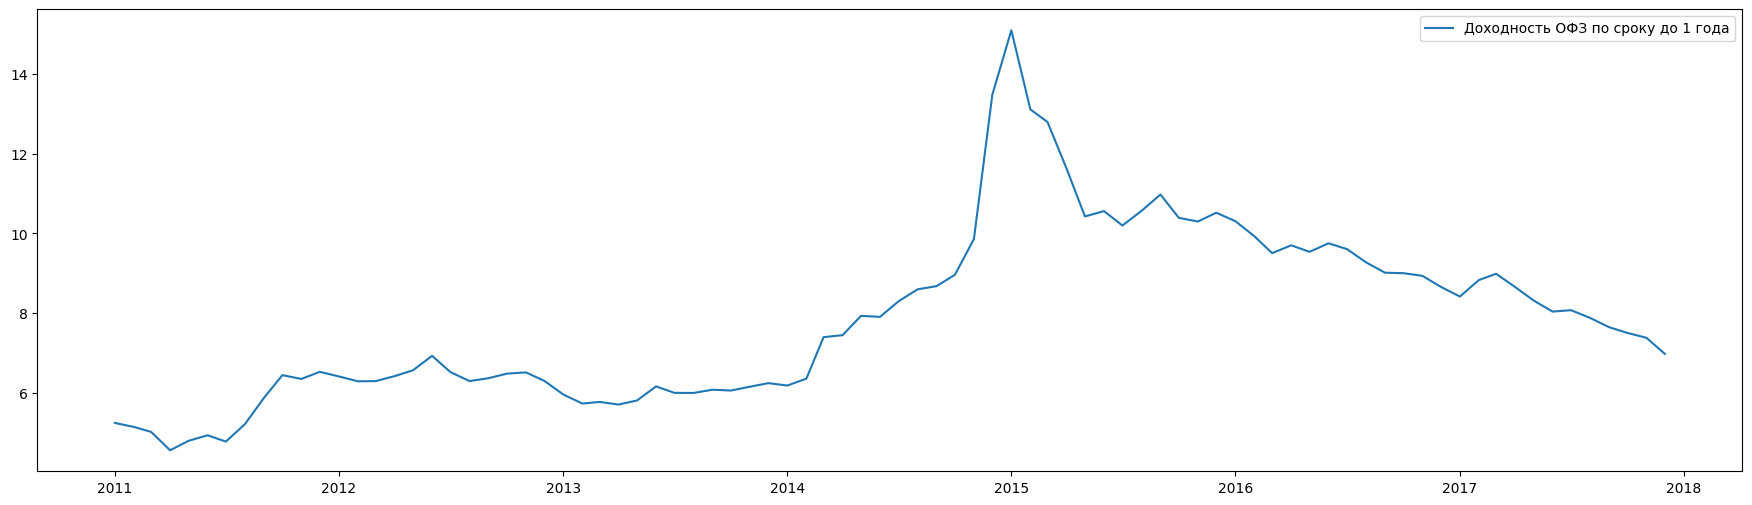

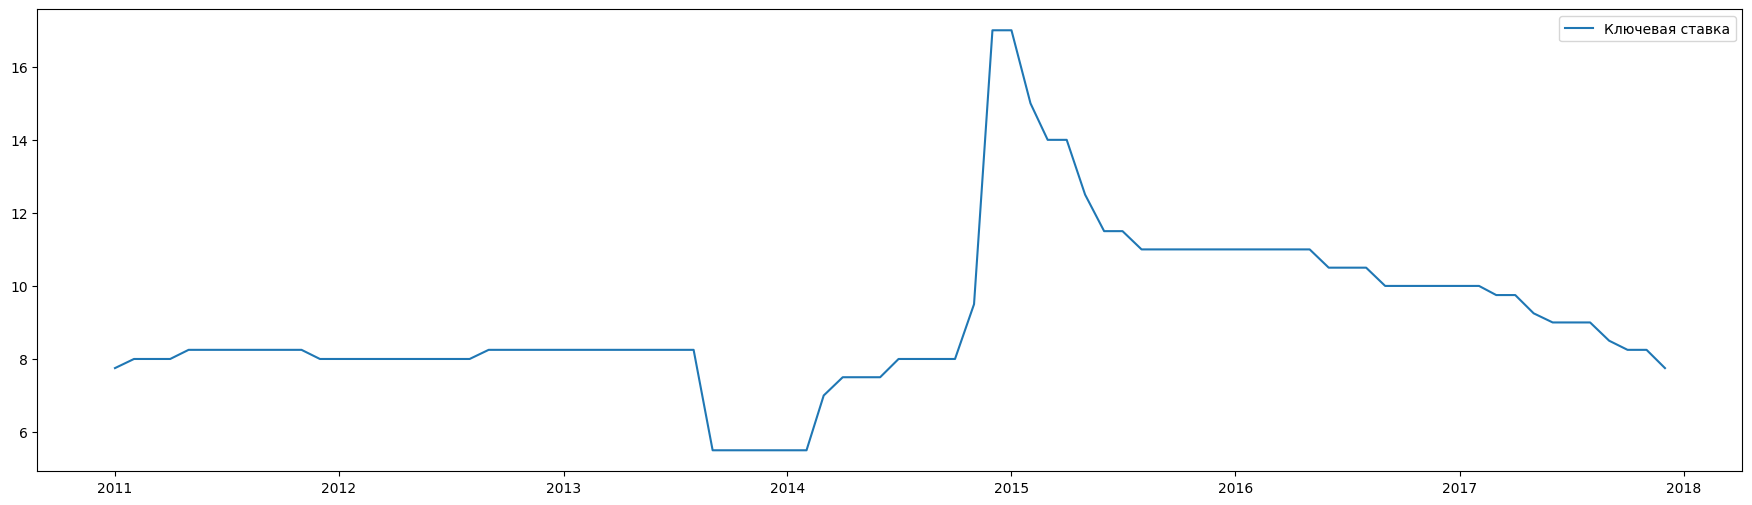

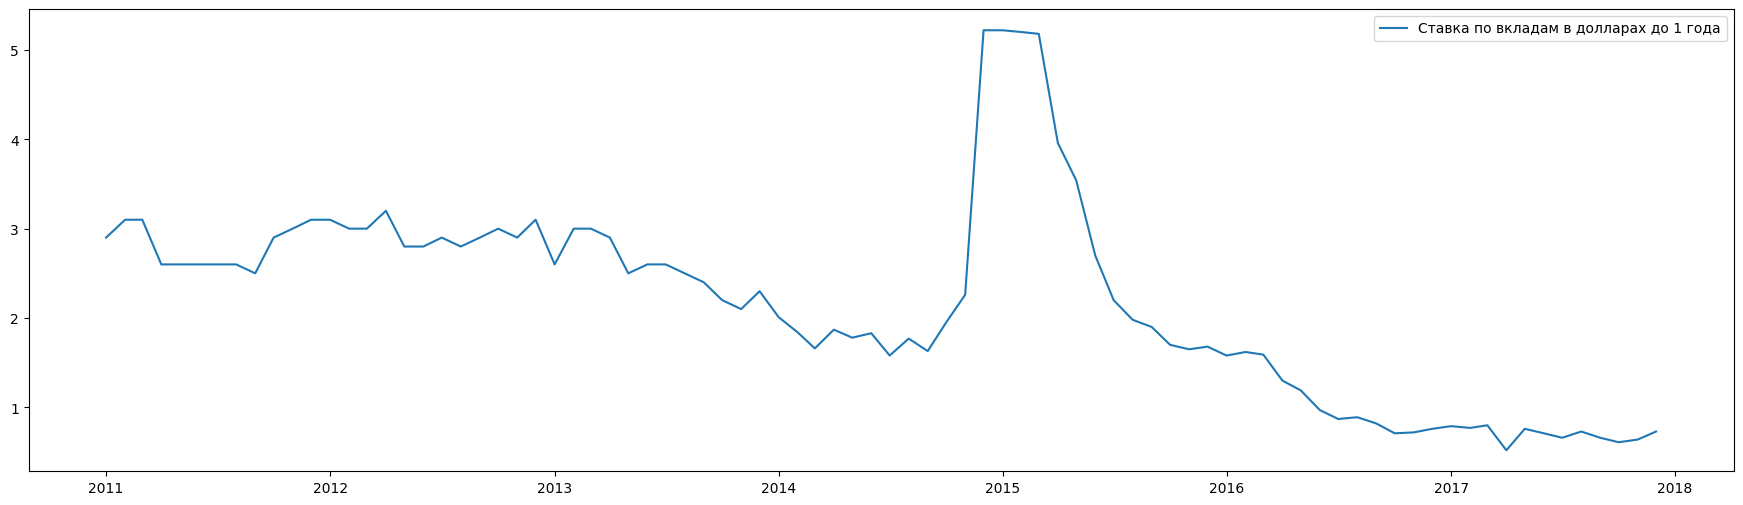

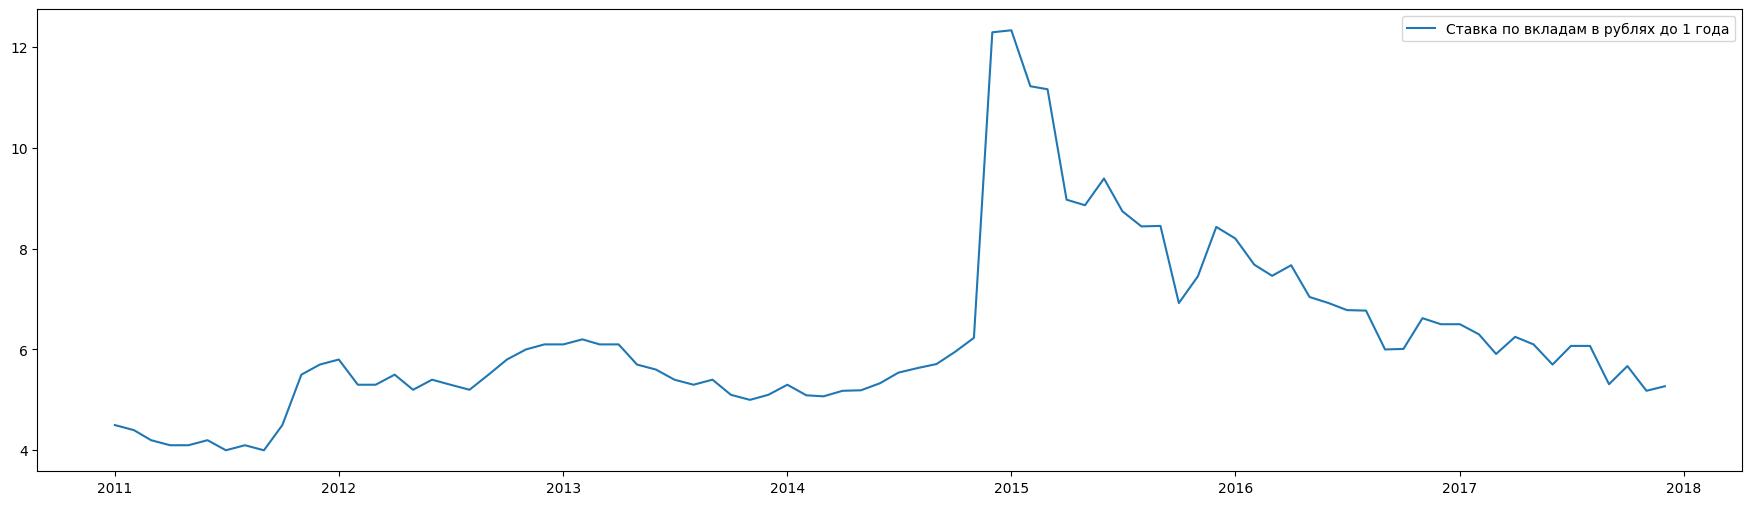

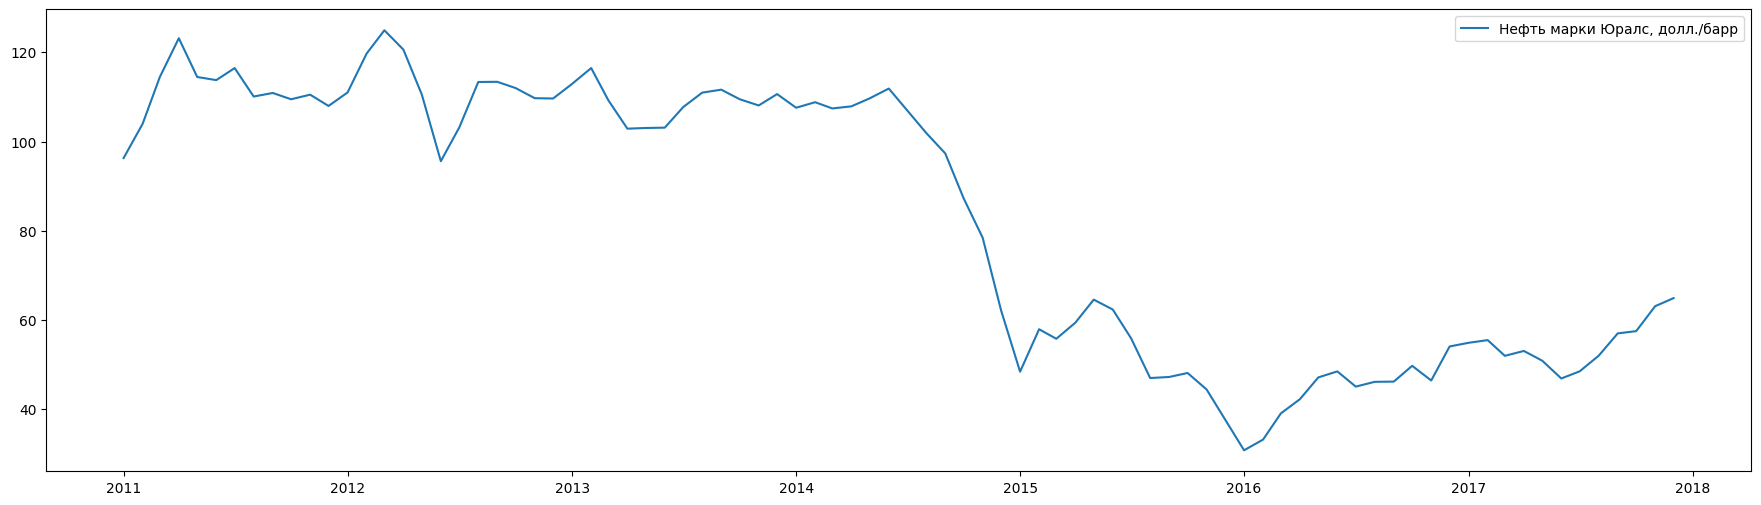

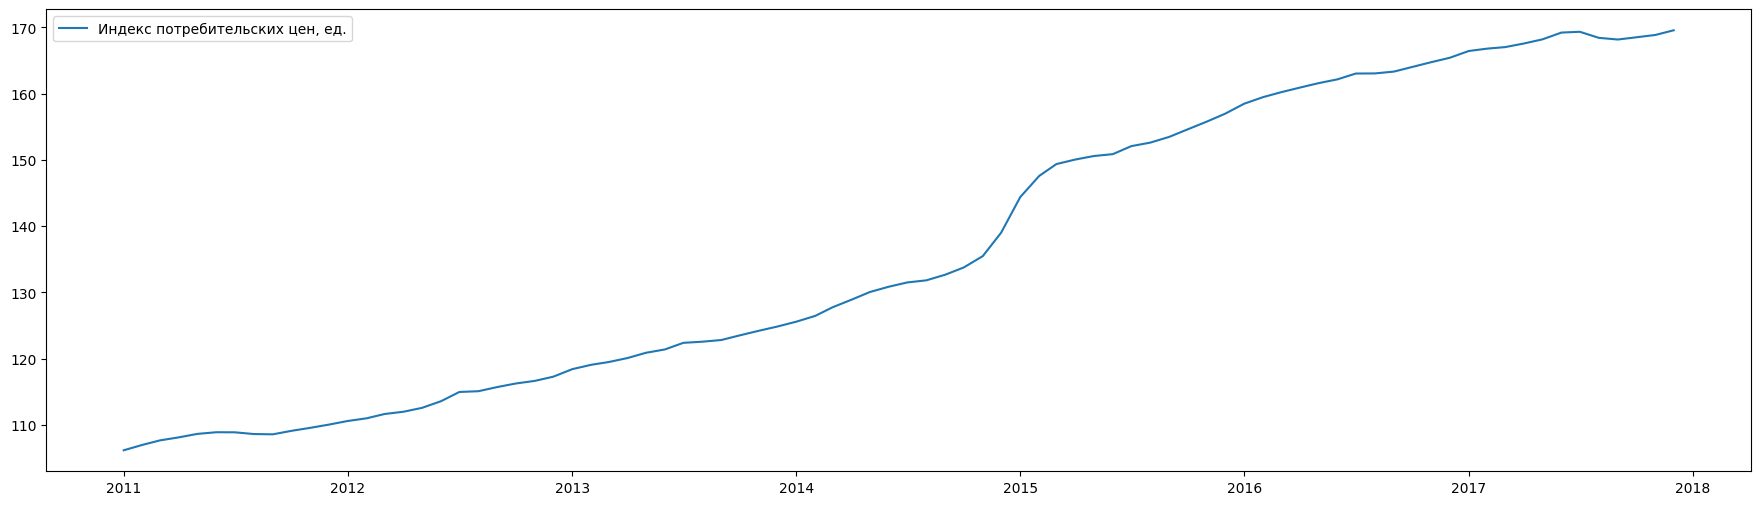

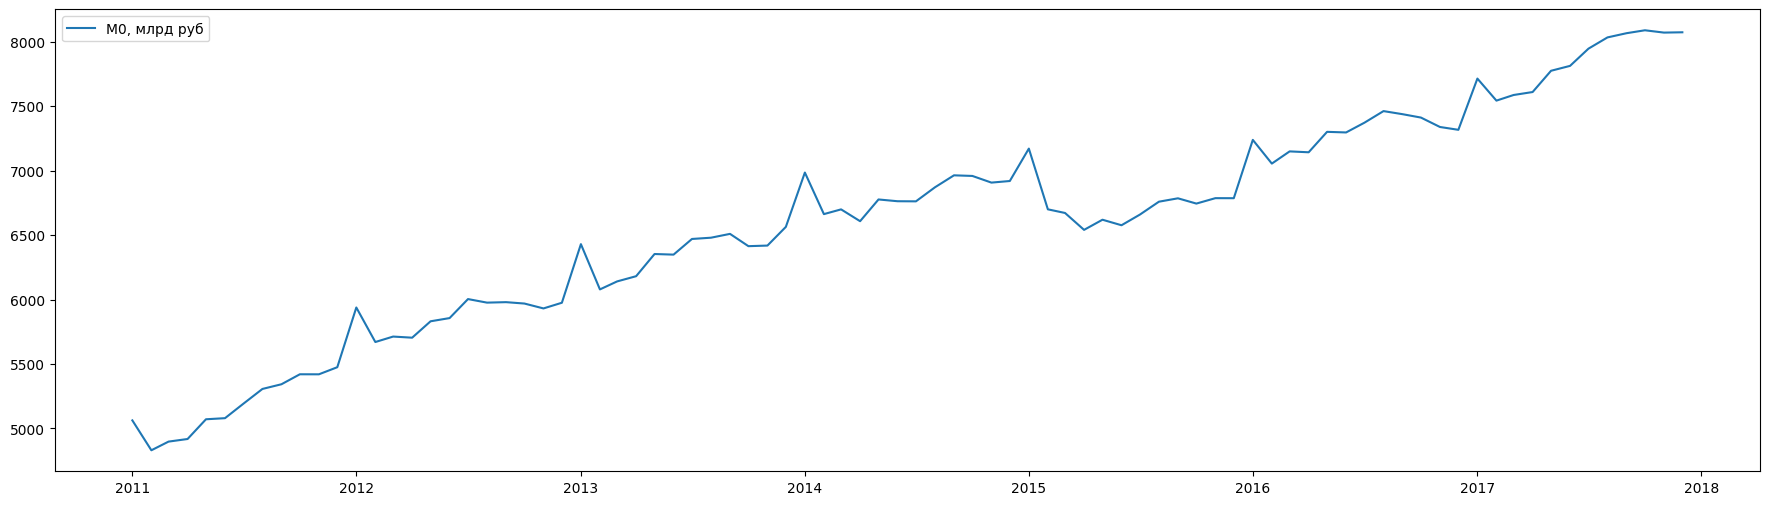

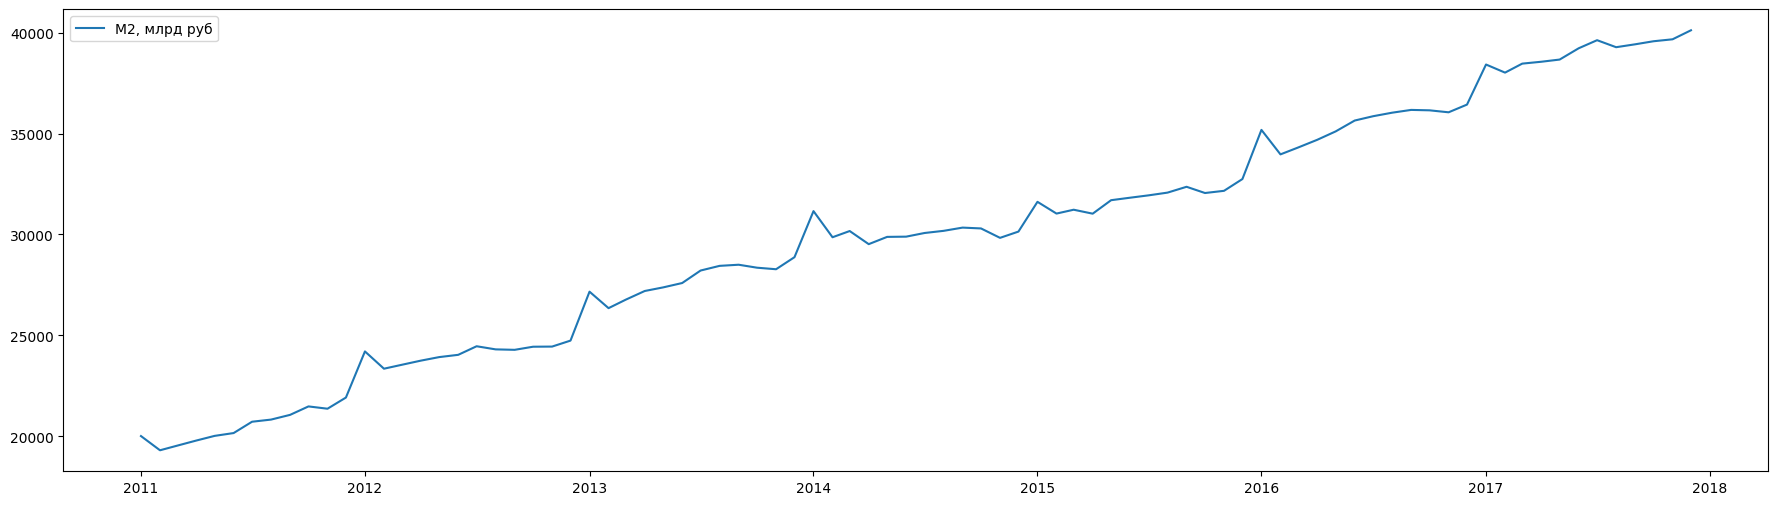

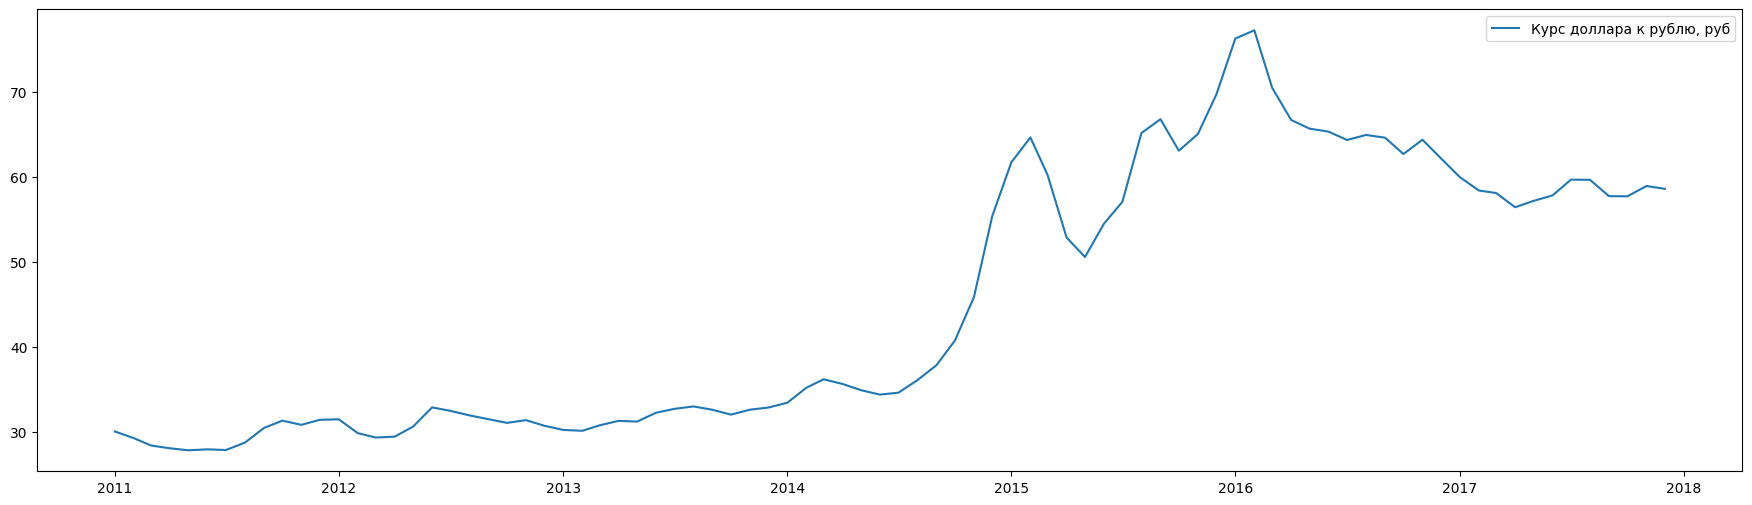

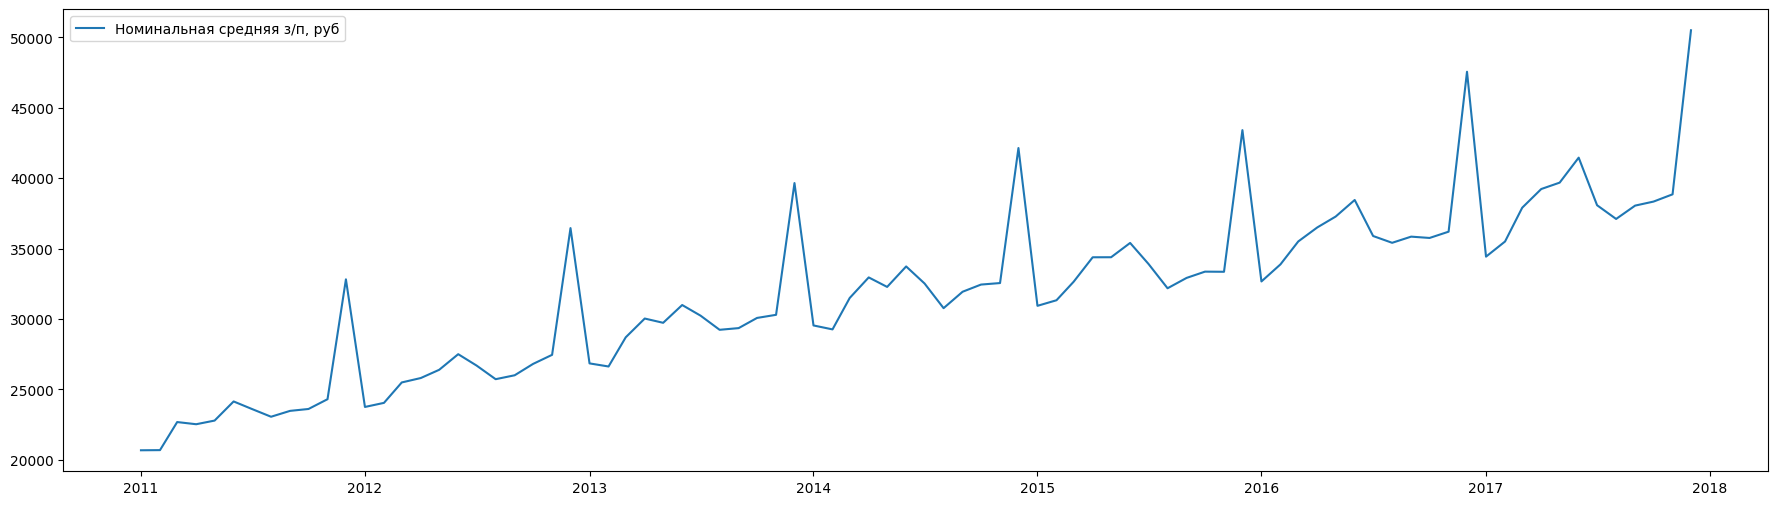

In [ ]:
# Отображаема данные на графиках
for i in range(1, data.shape[1]):
  plt.figure(figsize=(22,6))
  plt.plot(data.iloc[:, 0], data[data.columns[i]], label= data.columns[i])
  plt.legend()
  plt.show()

In [ ]:
# Количество вкладов физ лиц на 01.01.2012 согласно сайту Банка России https://cbr.ru/statistics/table/?tableId=302-21_old1
summ_deposits = 9690640  # Создаём переменную с суммой вкладов на 01.01.2012 в млн. руб.

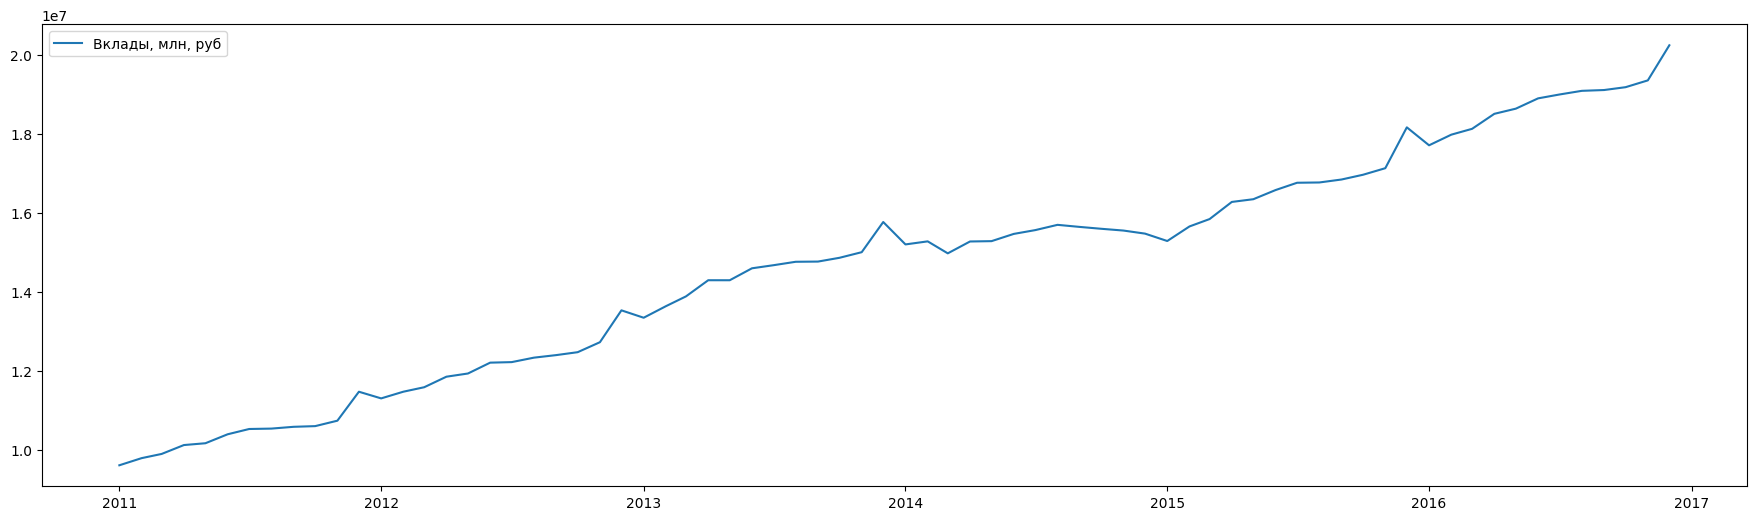

In [ ]:
# создаём датафрейм со вкладами и переводим прирост в обЪём вкладов с учётом прироста
list_1 = []
deposits = 0
deposits += summ_deposits
for i in data[data.columns[1]]:
    deposits += i
    list_1.append(deposits)
df = pd.DataFrame(list_1)

plt.figure(figsize=(22,6))
plt.plot(data.iloc[:, 0], df, label= 'Вклады, млн, руб')
plt.legend()
plt.show()

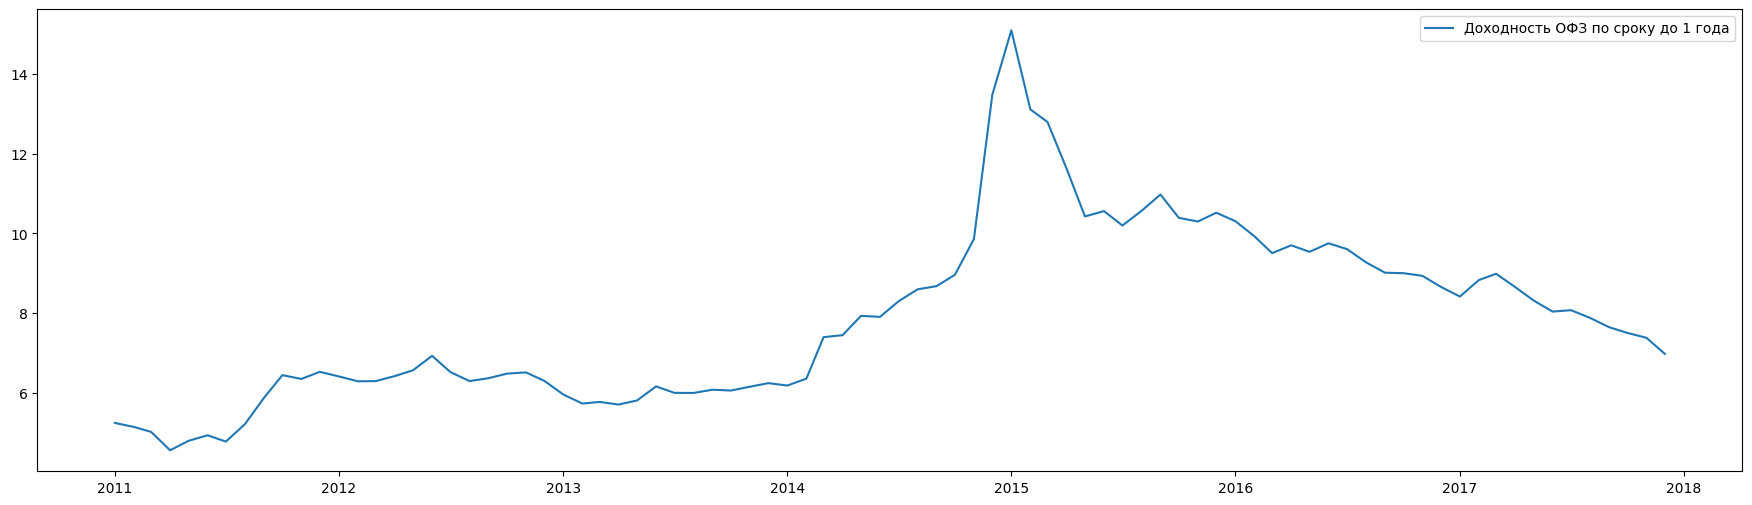

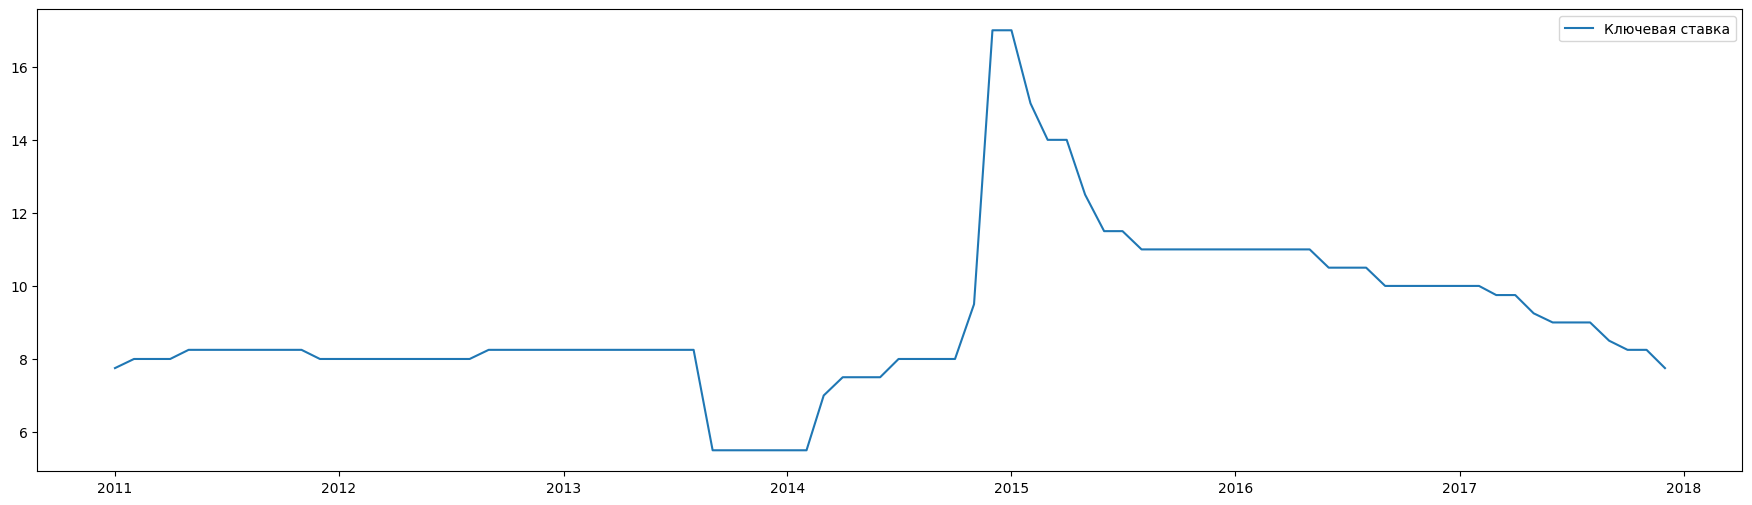

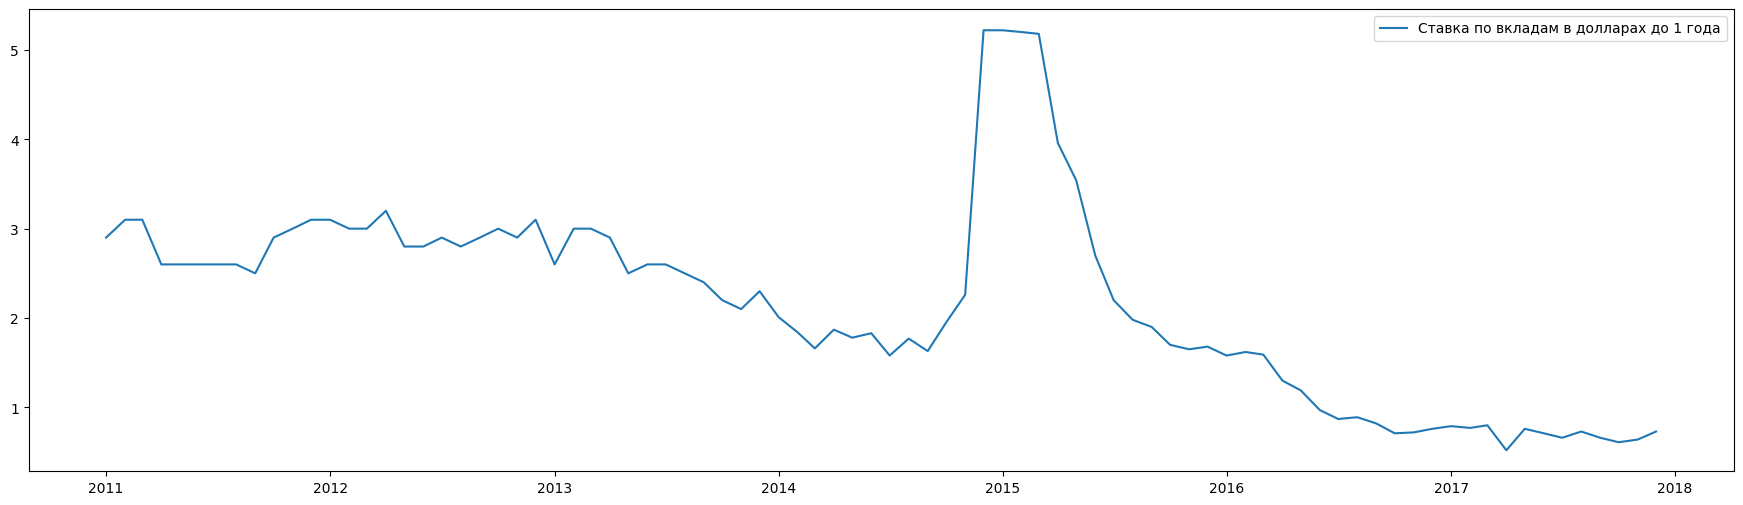

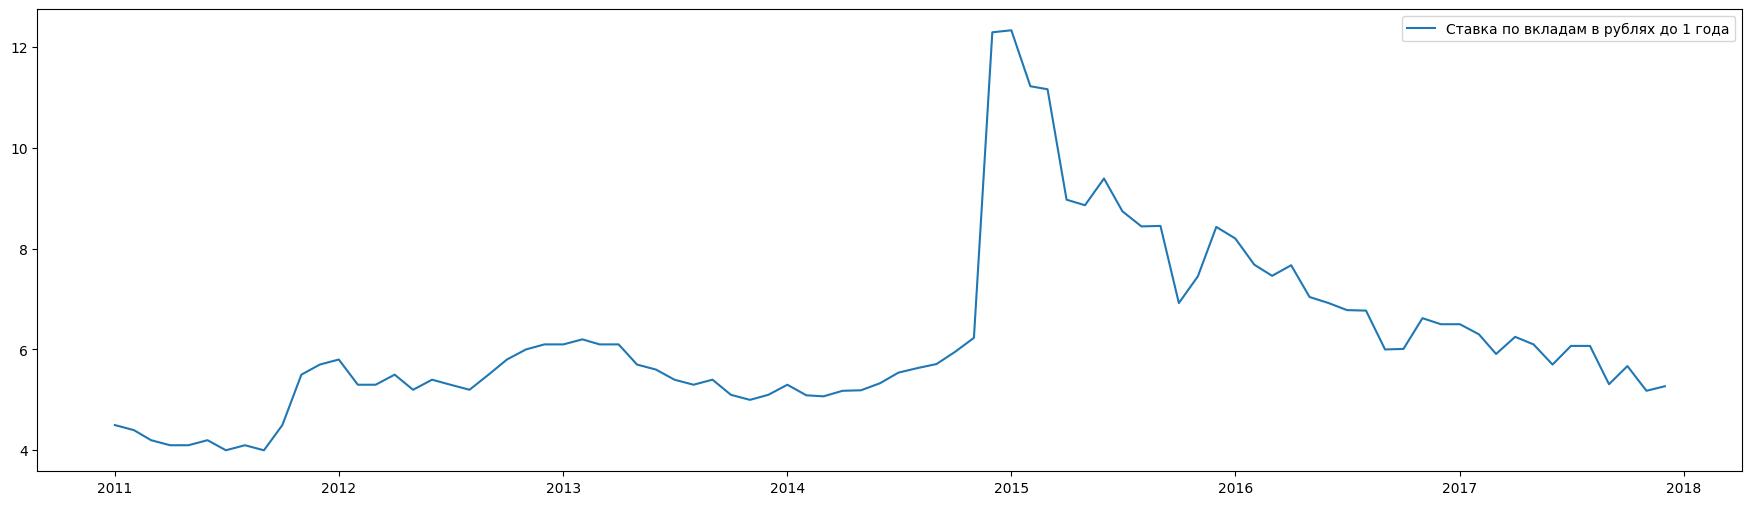

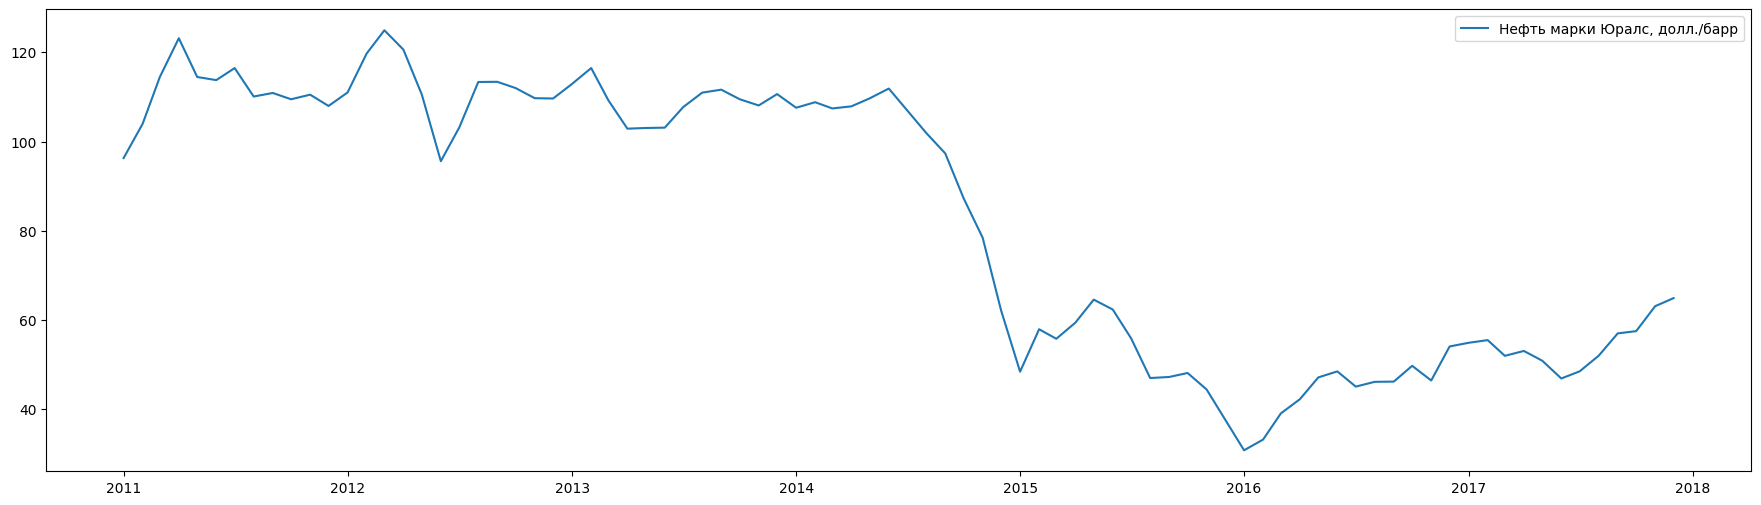

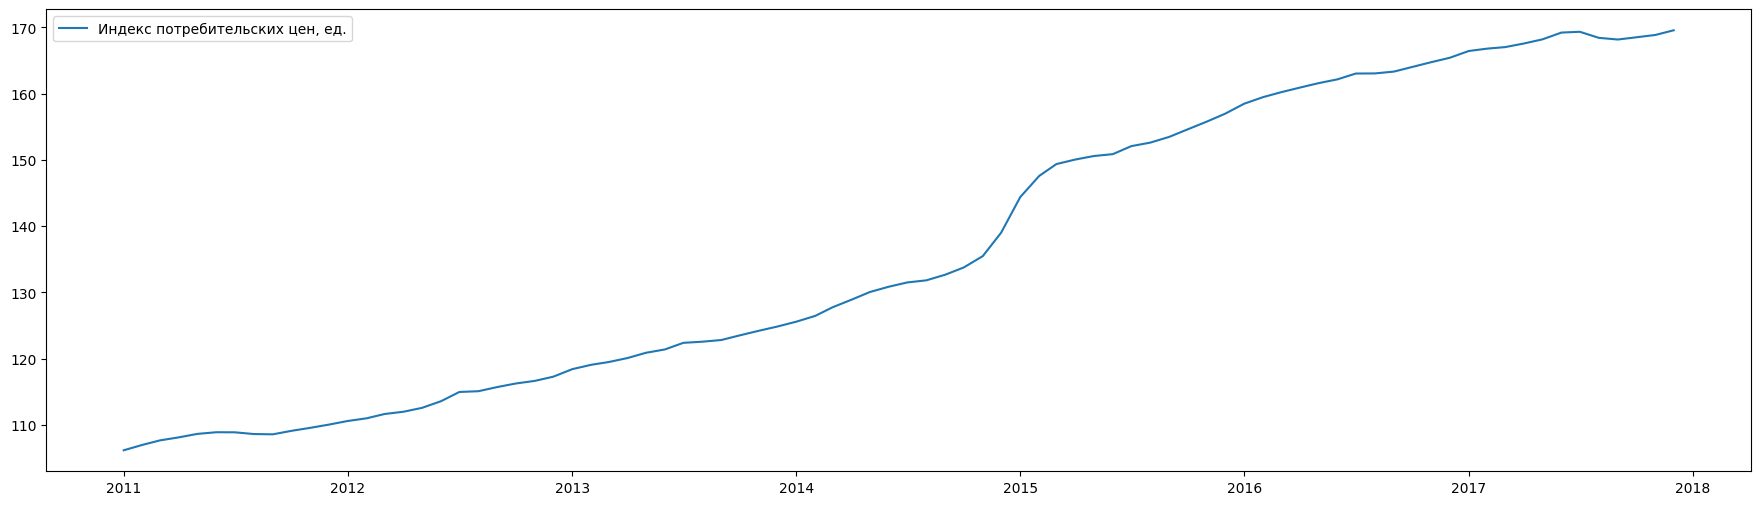

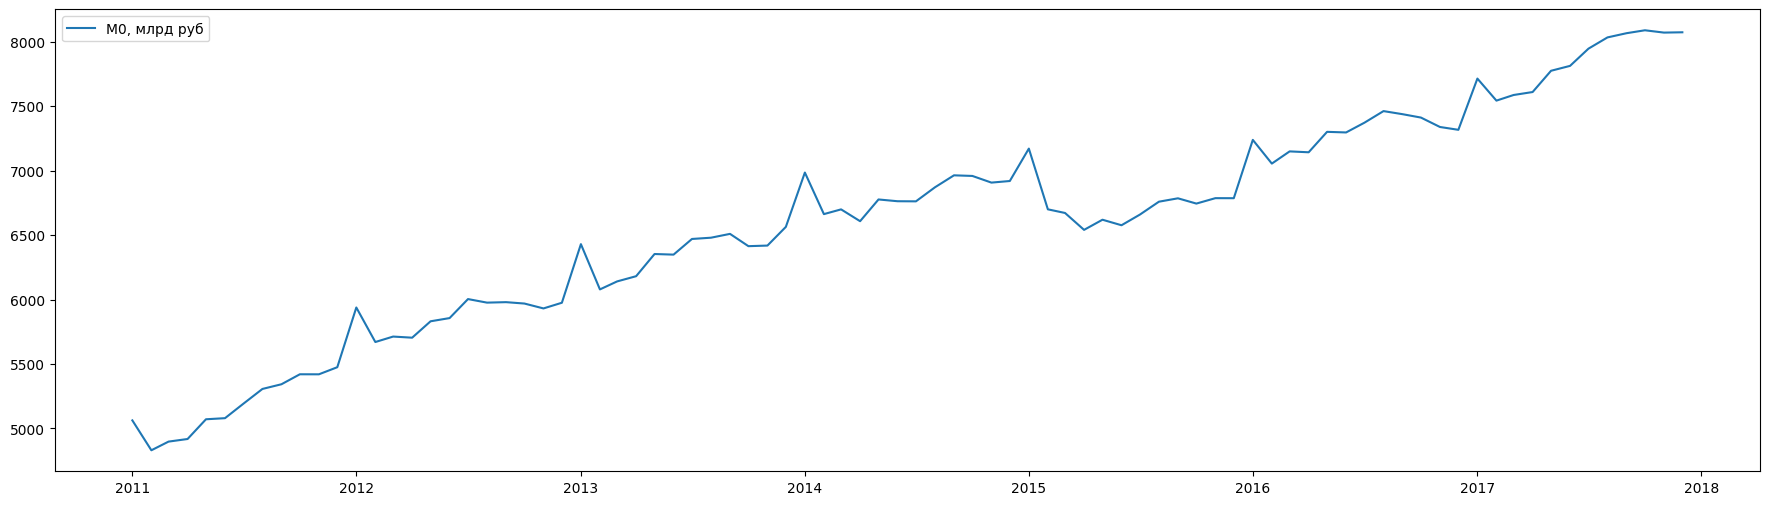

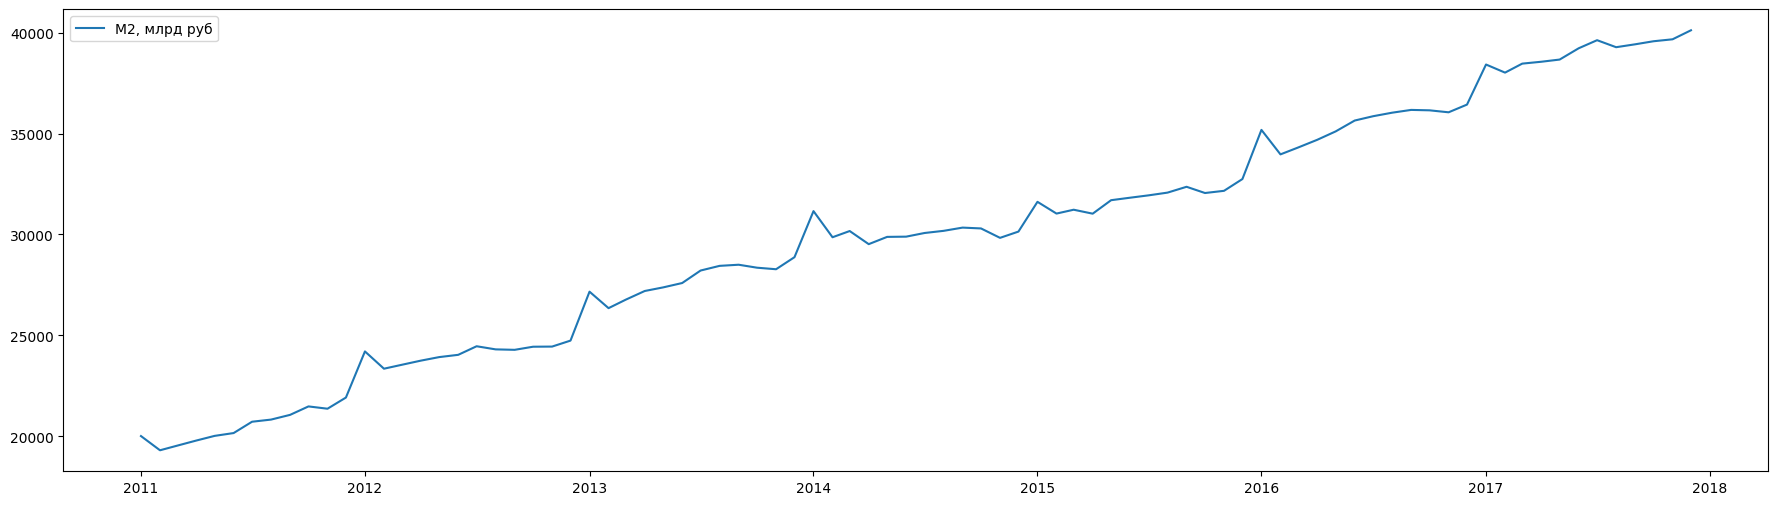

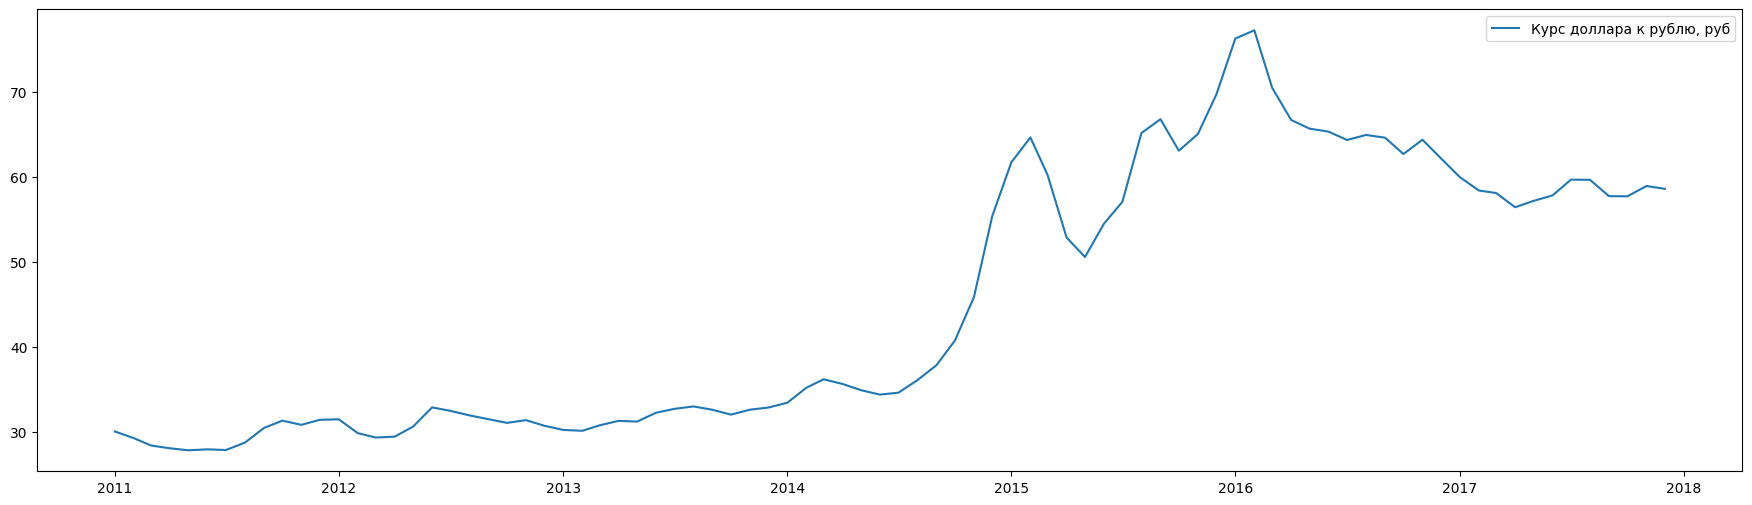

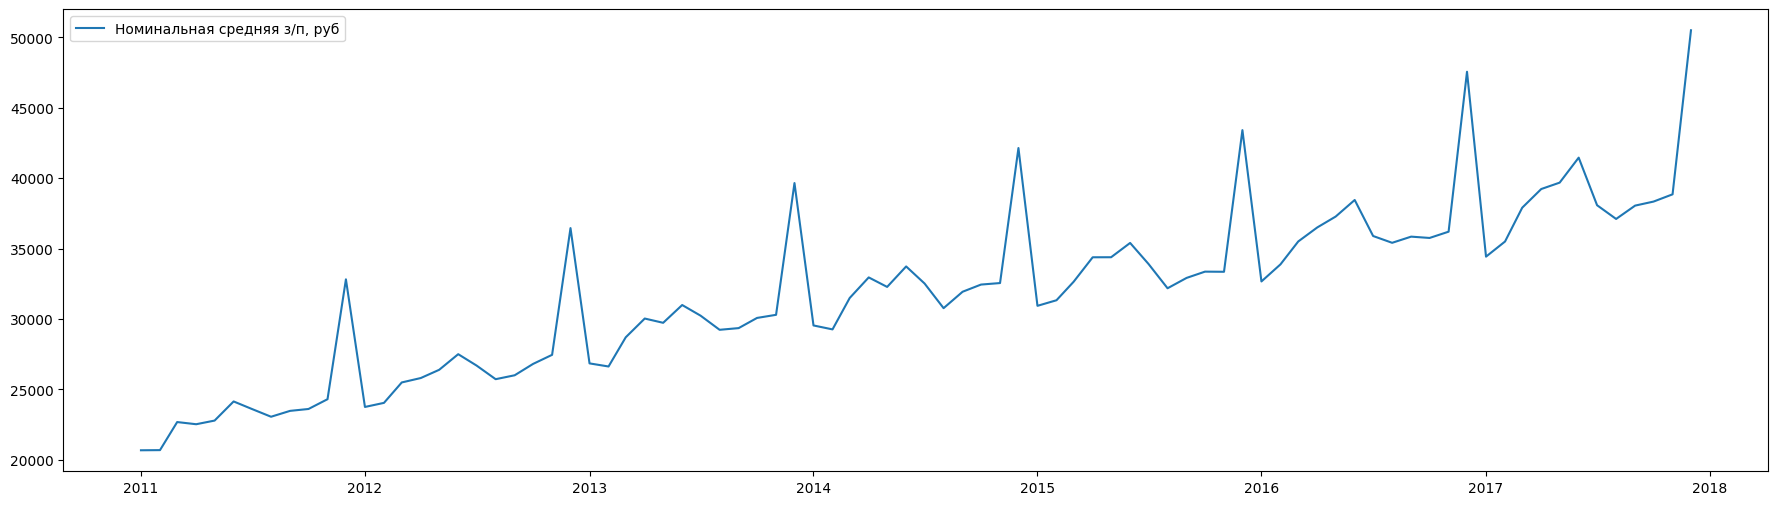

In [ ]:
# Ещё раз выводим на графики и смотрим что из показателей коррелирует с кривой вкладов
# Отображаема данные на графиках
for i in range(2, data.shape[1]):
  plt.figure(figsize=(22,6))
  plt.plot(data.iloc[:, 0], data[data.columns[i]], label= data.columns[i])
  plt.legend()
  plt.show()

In [ ]:
max_deposits = max(df[0])               #  Получаем максимальный объём вкладов для нормирования

y_dep_norm = df[0] / max_deposits       # Нормализуем значения
print(y_dep_norm)

0     0.474676
1     0.483589
2     0.488865
3     0.499972
4     0.502236
        ...   
79         NaN
80         NaN
81         NaN
82         NaN
83         NaN
Name: 0, Length: 84, dtype: float64


In [ ]:
'''
Согласно вышевыведенных графиков оставляем показатели:
Ставка по вкладам в рублях до 1 года
Индекс потребительских цен, ед.
М0, млрд руб
М2, млрд руб
Номинальная средняя з/п, руб
Курс доллара к рублю, руб
'''

x_rate = data[data.columns[5]]/max(data[data.columns[5]])   #
x_index_norm = data['Индекс потребительских цен, ед.']/max(data['Индекс потребительских цен, ед.'])
x_m0_norm = data['М0, млрд руб']/max(data['М0, млрд руб'])
x_m2_norm = data['М2, млрд руб']/max(data['М2, млрд руб'])
x_salary = data['Номинальная средняя з/п, руб']/max(data['Номинальная средняя з/п, руб'])
x_dollar = data['Курс доллара к рублю, руб']/max(data['Курс доллара к рублю, руб']) * -1 + 1  # обраьная зависимость

In [ ]:
# В названии столбца содержались скрытые символы Ставка по вкладам в рублях до 1 года
data.columns[5]

'Ставка по вкладам в рублях до\xa01\xa0года'

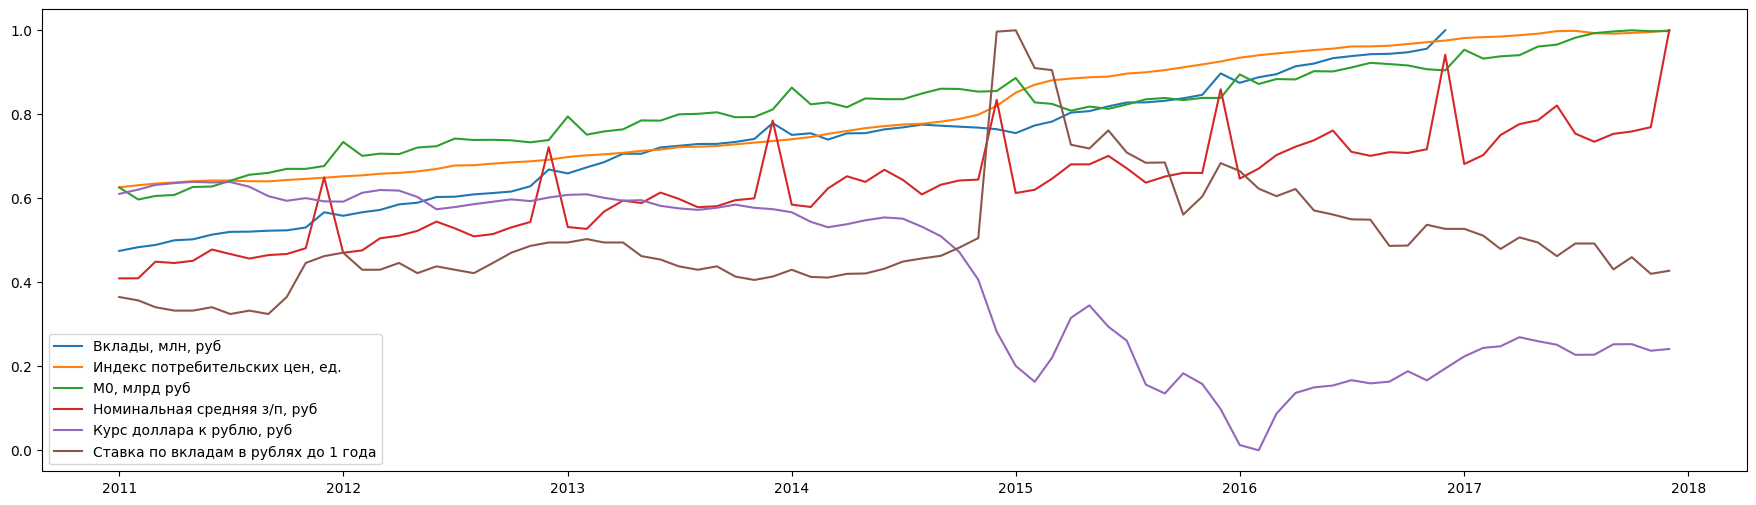

In [ ]:
# Выводим графики нормированных данных
plt.figure(figsize=(22,6))
plt.plot(data.iloc[:, 0], y_dep_norm, label= 'Вклады, млн, руб')
plt.plot(data.iloc[:, 0], x_index_norm, label= 'Индекс потребительских цен, ед.')
plt.plot(data.iloc[:, 0], x_m0_norm, label= 'М0, млрд руб')
#plt.plot(data.iloc[:, 0], x_m2_norm, label= 'М2, млрд руб')
plt.plot(data.iloc[:, 0], x_salary, label= 'Номинальная средняя з/п, руб')
plt.plot(data.iloc[:, 0], x_dollar, label= 'Курс доллара к рублю, руб')   # обраьная зависимость
plt.plot(data.iloc[:, 0], x_rate, label= data.columns[5])
plt.legend()
plt.show()

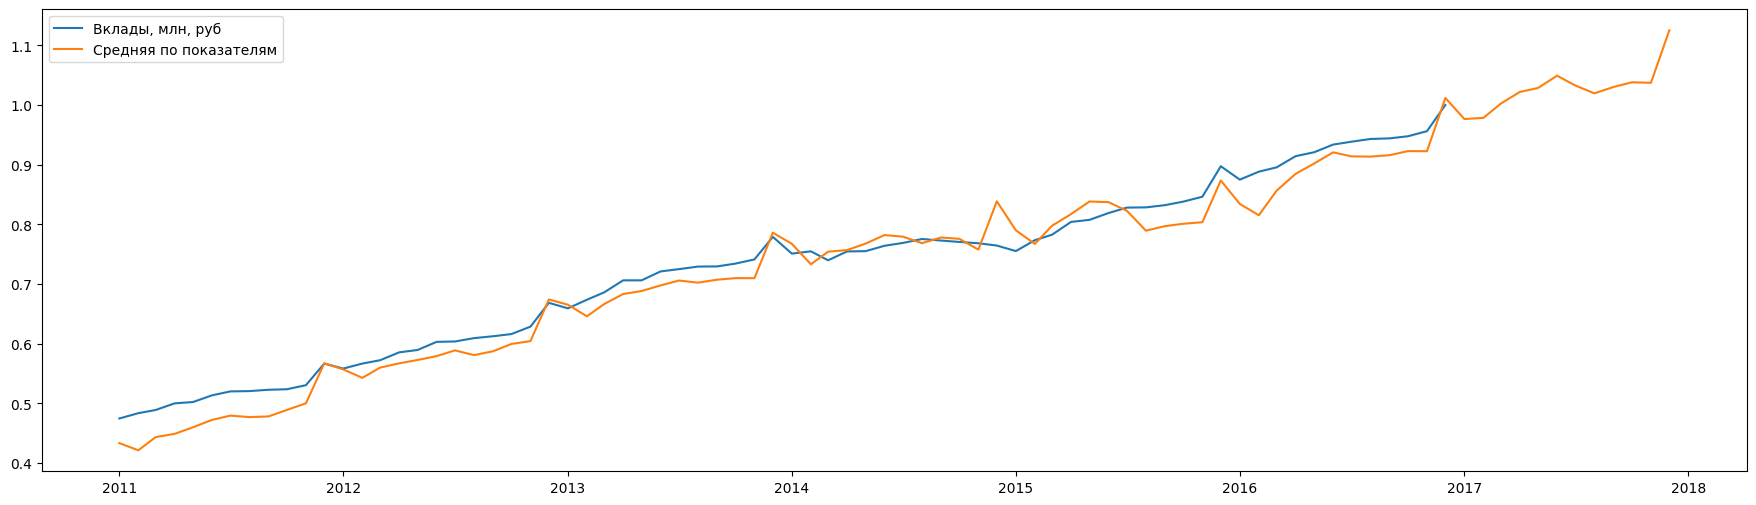

In [ ]:
# Вычисляем среднее и сближаем кривые графикво
x_mean = (x_rate * 0.4 + x_index_norm * 3 + x_m0_norm + x_m2_norm * 4 + x_salary * 2 + x_dollar * 1.5) / 6 - 0.63
plt.figure(figsize=(22,6))
plt.plot(data.iloc[:, 0], y_dep_norm, label= 'Вклады, млн, руб')
plt.plot(data.iloc[:, 0], x_mean, label= 'Средняя по показателям')

plt.legend()
plt.show()

#Прогнозирование

In [ ]:
df_pred = df.copy()                 # Делаем копию датафрейма для предикта

In [ ]:
sum_e = 0
counter = 0
for i in range(len(df_pred)):
  predict = df_pred.iloc[i, 0] / (x_mean[i] * max_deposits)
  if predict > 0:
       sum_e += predict - 1
       counter += 1

In [ ]:
error_mean = sum_e / counter    # вычисляем среднюю ошибку
print('Общая погрешность прогнозирования на ' + str(data.iloc[i, 0]) + ' составила ' + str(error_mean.round(2) * 100) + '%')

Общая погрешность прогнозирования на 2017-12-01 00:00:00 составила 3.0%


In [ ]:
# Прогнозируем значения  вкладов на 2017 год
predict_17 = []
for i in range(72, 84):
  predict_17.append((x_mean[i] * max_deposits).round(0))

df.iloc[72 : 84, 0] = predict_17   # Заполняем недостающие значения в рабочем датафрейме

In [ ]:
# summ_deposits = 9690640  # в млн. руб.

In [ ]:
df_pred = df - summ_deposits

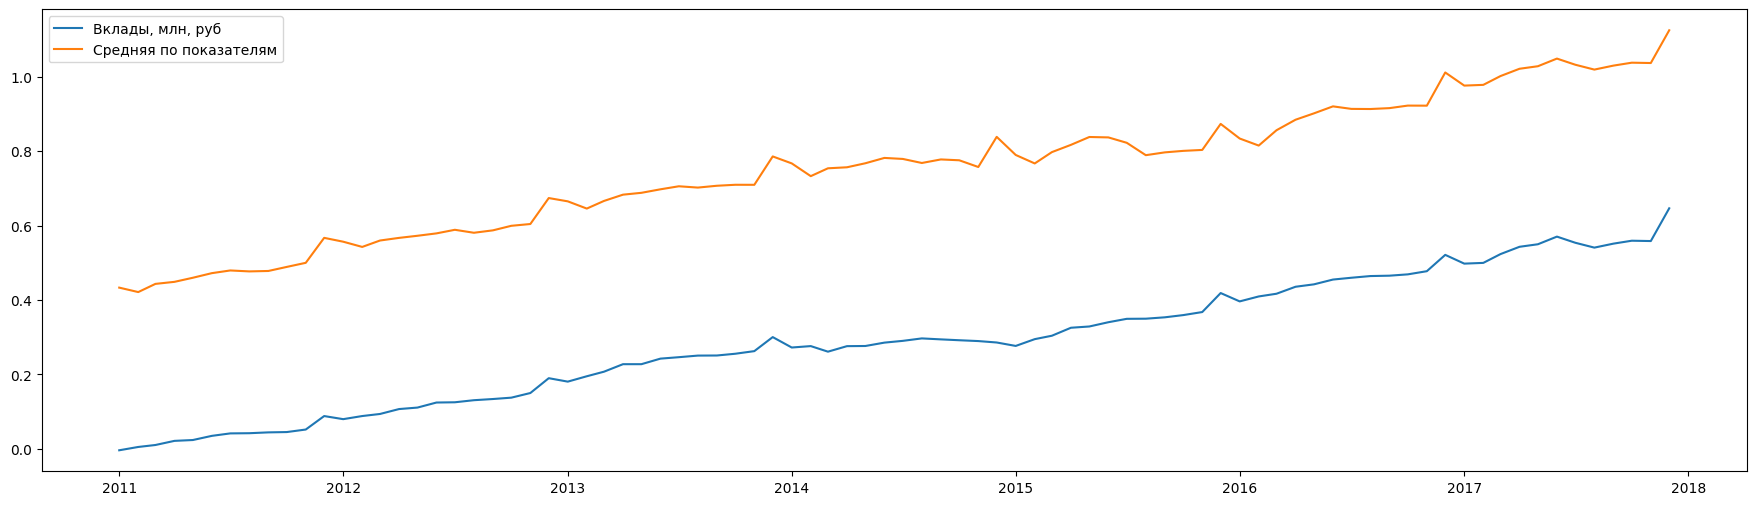

In [ ]:
plt.figure(figsize=(22,6))
plt.plot(data.iloc[:, 0], (df_pred / max_deposits), label= 'Вклады, млн, руб')
plt.plot(data.iloc[:, 0], x_mean, label= 'Средняя по показателям')

plt.legend()
plt.show()

In [ ]:
list_1 = []
growth = 0
deposits = 0
for i in df_pred[df_pred.columns[0]]:
    list_1.append(i)

In [ ]:
# получаем прирост вкладов физических лиц в рублях (млн руб)
growth = []
for i in range(len(list_1)):
  if i == 0:
    growth.append(list_1[i])
  else:
    growth.append(list_1[i] - list_1[i - 1])

df_pred = pd.DataFrame(growth)        # заполняем датафрейм

In [ ]:
data_pred = data.copy()                                                            # делаем копию общей таблицы для занесения рельтатов
data_pred['Прирост вкладов физических лиц в рублях (млн руб)'] = df_pred[0]        # Заполняем общую таблицу

#Выводим результат
data_pred.iloc[60:, :]

,Дата,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, млрд руб","М2, млрд руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб"
60,2016-01-01,-454791.0,10.308889,11.00,1.58,8.20,30.80,158.478660,7239.145905,35179.714815,76.25,32660
61,2016-02-01,269297.0,9.930476,11.00,1.62,7.68,33.20,159.477070,7055.140825,33966.453991,77.22,33873
62,2016-03-01,147971.0,9.505909,11.00,1.59,7.46,39.07,160.210670,7149.795460,34309.649661,70.47,35501
63,2016-04-01,379759.0,9.701905,11.00,1.30,7.67,42.25,160.915590,7142.892260,34689.448390,66.68,36497
64,2016-05-01,131129.0,9.538947,11.00,1.19,7.04,47.13,161.575350,7301.487971,35105.469375,65.66,37270
65,2016-06-01,260591.0,9.752857,10.50,0.97,6.92,48.48,162.157020,7296.764604,35642.933649,65.31,38447
66,2016-07-01,98589.0,9.606667,10.50,0.87,6.78,45.07,163.032670,7372.703720,35856.891826,64.33,35888
67,2016-08-01,92168.0,9.274348,10.50,0.89,6.77,46.14,163.048970,7462.394809,36031.670782,64.92,35405
68,2016-09-01,20272.0,9.015000,10.00,0.82,6.00,46.19,163.326150,7438.479529,36169.577926,64.60,35843
69,2016-10-01,72037.0,9.002381,10.00,0.71,6.01,49.73,164.028460,7412.196989,36148.750479,62.68,35749


# Выводы

In [ ]:
'''
Кривая вкладов населения коррелируется с такими факторами как:
  - Ставка по вкладам в рублях до 1 года
  - Индекс потребительских цен, ед.
  - М0, млрд руб
  - М2, млрд руб
  - Номинальная средняя з/п, руб
  - Курс доллара к рублю, руб

Следует отметить что на вклады сильно влияет сезонность.

Получилось построить модель прогнозирования со средней ошибкой в 3%

'''

'\nКривая вкладов населения коррелируется с такими факторами как:\n  - Ставка по вкладам в рублях до 1 года \n  - Индекс потребительских цен, ед.\n  - М0, млрд руб\n  - М2, млрд руб\n  - Номинальная средняя з/п, руб\n  - Курс доллара к рублю, руб\n  \nСледует отметить что на вклады сильно влияет сезонность.\n\nПолучилось построить модель прогнозирования со средней ошибкой в 3%\n\n'